In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
# df.sample(10)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(to_drop, axis=1, inplace=True)
# data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#removing duplicates from the data
print(df.duplicated().sum())
df.drop_duplicates(keep='first')

403


,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [8]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df['Num_characters']=df['Text'].apply(len)
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['Num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,Target,Text,Num_characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [11]:
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [12]:
#description of new columns for the whole dataset
df[['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
Num_words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
Num_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


In [13]:
#for ham messages
df[df['Target']==0][['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
Num_words,4825.0,17.276269,13.988585,1.0,8.0,13.0,22.0,220.0
Num_sentence,4825.0,1.837720,1.454388,1.0,1.0,1.0,2.0,38.0


In [14]:
#for spam messages
df[df['Target']==1][['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0
Num_words,747.0,27.891566,6.867007,2.0,25.0,29.0,32.0,46.0
Num_sentence,747.0,3.021419,1.537580,1.0,2.0,3.0,4.0,9.0


spam messages are bit longer (in terms of no. of character, words, etc) as can be seen in the histograms below

__DATA VISUALIZATION__

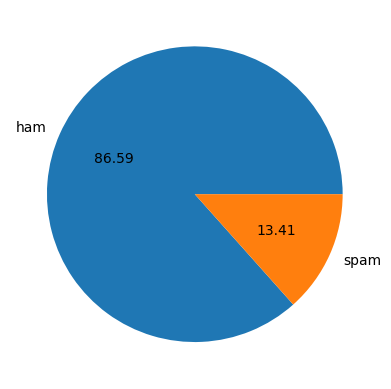

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()
fig.clear()

In [16]:
import seaborn as sns
sns.set_style('darkgrid')

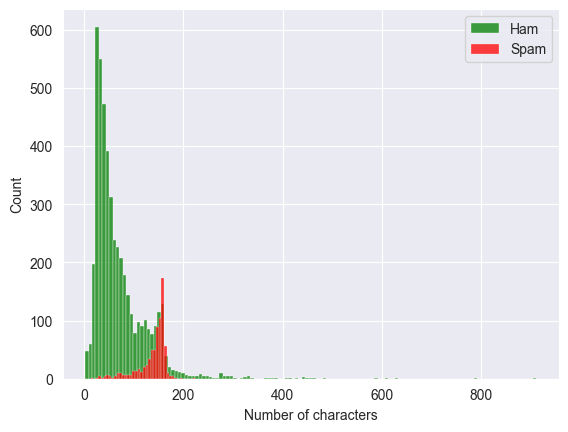

In [28]:
fig = plt.figure()
sns.histplot(df[df['Target']==0]['Num_characters'], color='green', label='Ham')
sns.histplot(df[df['Target']==1]['Num_characters'], color='red', label='Spam')
plt.xlabel('Number of characters')
plt.legend()
plt.show()
fig.clear()

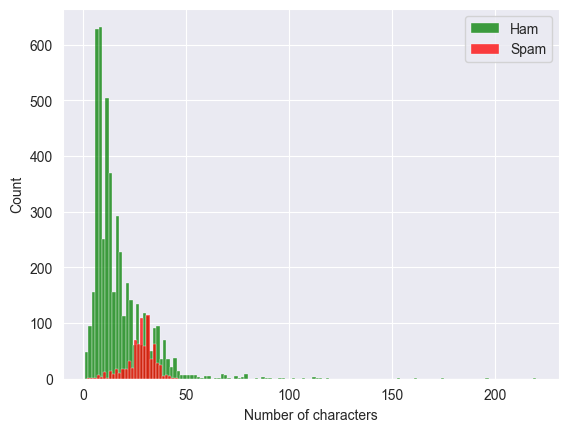

In [29]:
fig = plt.figure()
sns.histplot(df[df['Target']==0]['Num_words'], color='green', label='Ham')
sns.histplot(df[df['Target']==1]['Num_words'], color='red', label='Spam')
plt.xlabel('Number of characters')
plt.legend()
plt.show()
fig.clear()

<Figure size 640x480 with 0 Axes>

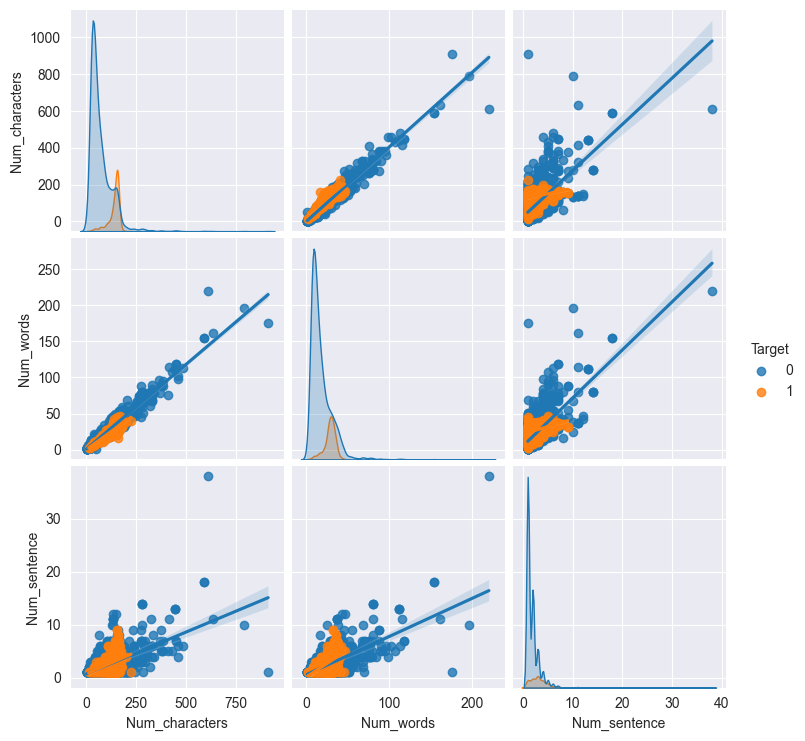

In [37]:
fig = plt.figure()
sns.pairplot(df, kind='reg', hue='Target', diag_kind='auto')
plt.show()
fig.clear()

_Here we can see that there are a few outliers for ham messages (higher character and word count) and these can be removed to make our model much better. But for now, we will use the data as it is and then see if any improvement is needed_

__DATA PREPROCESSING__
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#ps.stem('word')
ps = PorterStemmer()
import string
string.punctuation
# stopwords.words('english')

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    new_text = []
    
    for i in text:
        alpha_num = i.isalnum()
        not_stopword = i not in stopwords.words('english')
        not_punctuation = i not in string.punctuation
        if np.array([alpha_num, not_stopword, not_punctuation]).all():
            new_text.append(ps.stem(i))
    return ' '.join(new_text)

In [19]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [20]:
text_transform(df['Text'][2000])

'b go 2 sch mon si need 2 take smth'

In [21]:
df['transformed_text'] = df['Text'].apply(text_transform)
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [22]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [23]:
from collections import Counter
# Counter(spam_corpus)

In [24]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


__MODEL BUILDING__
- The model that is most suited for text based data is the Naive-Bayes model (a common knowledge apparently in the field of Machine learning)
- But we will also try some other classification algorithms like random forests to see how they perform on this data

_we have the output ('Target') as numbers, but the input (i.e transformed_text) is still in text format. This needs conversion from text --> vectors (vectorization) so that it can be understood by the machine_
- bag of words
- TfIdf
- word to vec


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [26]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [27]:
X.shape

(5572, 6708)

In [28]:
y = df['Target'].values

In [29]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, make_scorer
from sklearn.metrics import precision_recall_curve, auc

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

-___We will be relying more on the precision score rather than the accuracy as the data is imbalanced (significantly more number of  ham compared to spam)___
-___That is why, the precision is a better indicator (along with the confusion matrix) of the performance of the model___

In [32]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [33]:
model_dict = {'Gaussian NB': gnb, 'Bernoulli NB': bnb, 'Multinomial NB': mnb}

In [66]:
model_list = list(model_dict.keys())
accuracy_scores = []
precision_scores = []
recall_scores =[]
f1_scores = []
scorer = {'Accuracy': make_scorer(accuracy_score), 'Precision': make_scorer(precision_score),
         'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for key, model in model_dict.items():
    print(key)
    scores = []
    # Generate cross-validated predictions
    cv_scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scorer)
    
    accuracy_scores.append(np.mean(cv_scores['test_Accuracy']))

    precision_scores.append(np.mean(cv_scores['test_Precision']))

    recall_scores.append(np.mean(cv_scores['test_Recall']))

    f1_scores.append(np.mean(cv_scores['test_F1']))

    

model_performance = {'Model': model_list, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall':recall_scores,
                     'F1': f1_scores}

Gaussian NB
Bernoulli NB
Multinomial NB


In [67]:
model_performance = pd.DataFrame(model_performance).sort_values(by='F1', ascending=False)
model_performance

,Model,Accuracy,Precision,Recall,F1
1,Bernoulli NB,0.972853,0.969647,0.817896,0.886836
2,Multinomial NB,0.963651,1.000000,0.724871,0.839810
0,Gaussian NB,0.873681,0.511755,0.887015,0.647246


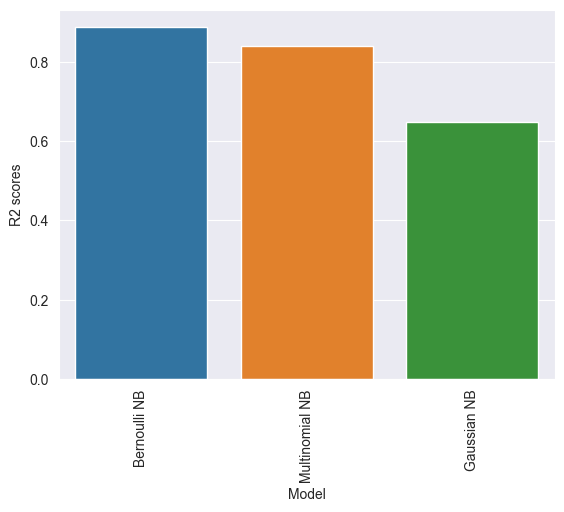

In [68]:
fig = plt.figure()
sns.barplot(x="Model", y='F1',data=model_performance)
plt.xlabel('Model')
plt.ylabel('R2 scores')
# plt.legend()
plt.xticks(rotation=90)
plt.show()
fig.clear()

### Using CV technique to tune hyperparameters for Bernoulli and Multinomial NB

### _Bernoulli Naive Bayes_
 
Using the CV techique to tune the hyperparameters

In [34]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.1,1,0.1)}
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=kf)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.1}


In [35]:
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred_bnb))
print('confusion matrix: ',confusion_matrix(y_test, y_pred_bnb))
print('precision: ', precision_score(y_test, y_pred_bnb))
print('f1: ', f1_score(y_test, y_pred_bnb))

accuracy:  0.979372197309417
confusion matrix:  [[952   5]
 [ 18 140]]
precision:  0.9655172413793104
f1:  0.9240924092409241


### _Multinomial Naive Bayes_
 
Using the CV techique to tune the hyperparameters

In [96]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.1,1,0.1)}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=kf)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.2}


In [36]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred_mnb))
print('confusion matrix: ',confusion_matrix(y_test, y_pred_mnb))
print('precision: ', precision_score(y_test, y_pred_mnb))
print('f1: ', f1_score(y_test, y_pred_mnb))

accuracy:  0.9739910313901345
confusion matrix:  [[952   5]
 [ 24 134]]
precision:  0.9640287769784173
f1:  0.9023569023569024


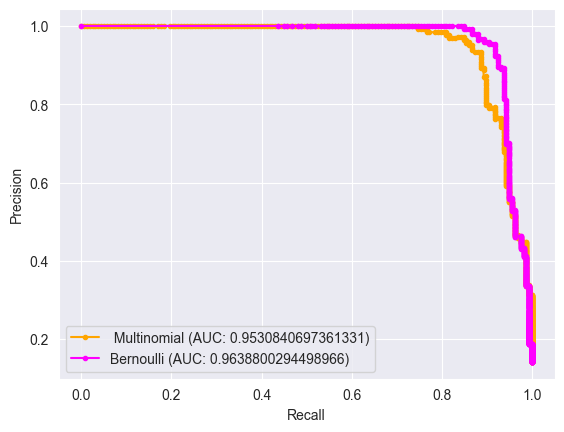

In [44]:
bnb_probs = bnb.predict_proba(X_test)
bnb_precision, bnb_recall, bnb_threshold = precision_recall_curve(y_test, bnb_probs[:,1])
bnb_auc = auc(bnb_recall, bnb_precision)
mnb_probs = mnb.predict_proba(X_test)
mnb_precision, mnb_recall, mnb_threshold = precision_recall_curve(y_test, mnb_probs[:,1])
mnb_auc = auc(mnb_recall, mnb_precision)
fig = plt.figure()
# plt.plot([0, 1], [b, b], linestyle='--', label='No Skill')
plt.plot(mnb_recall, mnb_precision, marker='.', color='orange', label=f' Multinomial (AUC: {mnb_auc})')
plt.plot(bnb_recall, bnb_precision, marker='.',color='magenta', label=f'Bernoulli (AUC: {bnb_auc})')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
fig.clear()